In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import splrep
from scipy.interpolate import BSpline

%matplotlib inline 

In [2]:
df = pd.read_csv('../data/data1.csv')
df = df.sort_values('x')
df.head()

,x,y
73,0.006248,17.329551
142,0.104671,15.268703
34,0.246137,15.394678
17,0.420595,12.743181
5,0.455565,15.480800


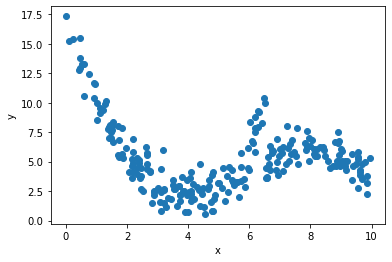

In [3]:
plt.scatter(df.x, df.y);
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**A (cubic) B-spline regression of y on x, with knots chosen at the quartiles.**

In [4]:
#Get quartiles (knots)
quarts = df['x'].quantile([0.25, 0.5, 0.75]).values.reshape(-1)
print(quarts)

[2.74220877 4.82472501 7.26165491]


In [5]:
### edTest(test_splrep) ###
#Find the BSpline representation using splrep()
def test_splrep():
    #t,c,k = splrep(________)
    t,c,k = splrep(df.x, df.y,task=-1,t=quarts)
    return t,c,k

t,c,k = test_splrep()
#A tuple (t,c,k) containing the vector of knots, the B-spline coefficients, and the degree of the spline.


In [6]:
### edTest(test_bspline_model) ###
def test_bspline_model():
    #return BSpline(_______)
    return BSpline(t, c, k)

b_spline_model = test_bspline_model()

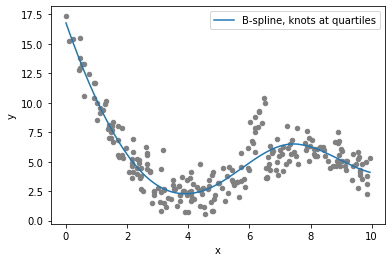

In [7]:
ax = df.plot.scatter(x='x',y='y',c='grey')
ax.plot(df['x'], b_spline_model(df['x']), label="B-spline, knots at quartiles")
plt.legend()
plt.show()